# Exploratory Data Analysis – Retail Sales

This notebook explores sales, profit, discount, and segment-level patterns
to validate insights derived from SQL analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", "{:,.2f}".format)
df = pd.read_csv("../data/raw_sales_data.csv")

In [2]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [3]:
df[['Sales', 'Profit']].describe()

,Sales,Profit
count,"9,994.00","9,994.00"
mean,229.86,28.66
std,623.25,234.26
min,0.44,"-6,599.98"
25%,17.28,1.73
50%,54.49,8.67
75%,209.94,29.36
max,"22,638.48","8,399.98"


In [4]:
(df['Sales'] <= 0).sum()
(df['Profit'].isna()).sum()

0

**Sales Distribution**

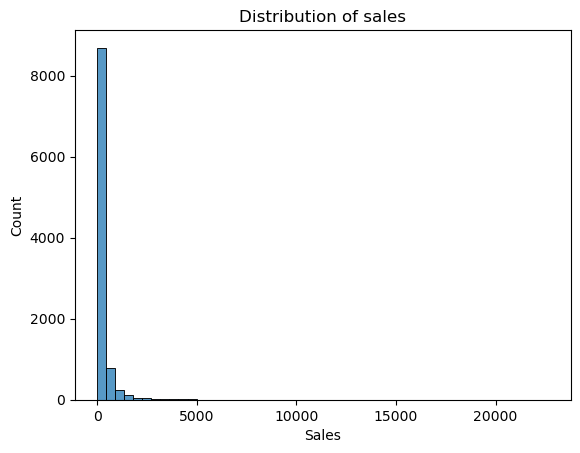

In [5]:
plt.figure()
sns.histplot(df['Sales'],bins=50)
plt.title("Distribution of sales")
plt.show()

**Profit distribution**

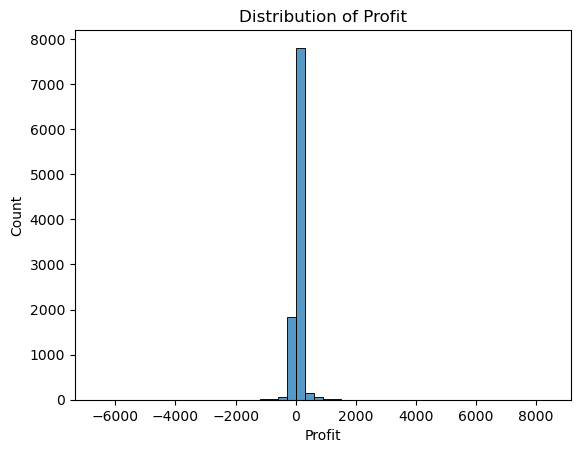

In [6]:
plt.figure()
sns.histplot(df['Profit'],bins=50)
plt.title("Distribution of Profit")
plt.show()

**Discount vs Profit**

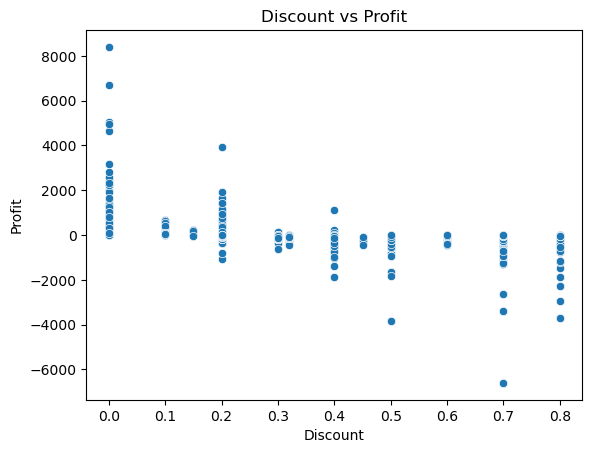

,Discount,Sales,Profit
0,0.00,226.74,66.90
1,0.10,578.40,96.06
2,0.15,529.97,27.29
3,0.20,209.08,24.70
4,0.30,454.74,-45.68
5,0.32,536.79,-88.56
6,0.40,565.13,-111.93
7,0.45,498.63,-226.65
8,0.50,892.71,-310.70
9,0.60,48.15,-43.08


In [7]:
plt.figure()
sns.scatterplot(x='Discount',y='Profit',data=df)
plt.title("Discount vs Profit")
plt.show()


discount_profit = (
    df.groupby('Discount')[['Sales', 'Profit']].mean().reset_index()
)

discount_profit


**Segment-level comparison**

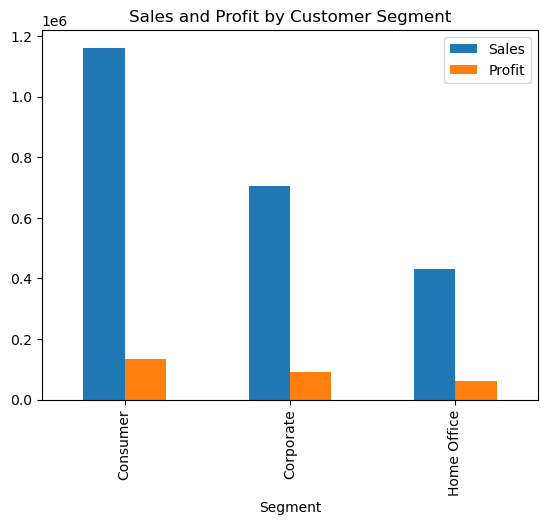

,Sales,Profit
Segment,,
Consumer,"1,161,401.34","134,119.21"
Corporate,"706,146.37","91,979.13"
Home Office,"429,653.15","60,298.68"


In [8]:
segment_summary = (
    df.groupby('Segment')[['Sales','Profit']]
        .sum()
        .sort_values(by='Profit', ascending = False)
)


segment_summary.plot(kind='bar')
plt.title("Sales and Profit by Customer Segment")
plt.show()

segment_summary

**Category profitability check**

In [9]:
category_summary=(
    df.groupby('Category')[['Sales','Profit']]
    .sum()
    .sort_values(by='Profit',ascending = False)
)
category_summary

,Sales,Profit
Category,,
Technology,"836,154.03","145,454.95"
Office Supplies,"719,047.03","122,490.80"
Furniture,"741,999.80","18,451.27"


## Key EDA Observations

- Sales and profit distributions are highly skewed, with a small number of high-value orders driving a large portion of revenue.
- Profit shows significant negative outliers, supporting earlier findings on loss-making orders.
- Discount levels above 30% are strongly associated with reduced or negative profitability.
- Consumer and Corporate segments dominate both revenue and profit contribution.
